In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load your dataset
from google.colab import files
import pandas as pd

# Upload a file from your computer
uploaded = files.upload()

# Load the uploaded CSV
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f'Loaded: {filename}')

df = pd.read_csv('nba_traditional_stats_2020_2025_all.csv')


# Fix encoding issues in Season_Type (if needed)
df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ', regex=False)

Saving nba_traditional_stats_2020_2025_all.csv to nba_traditional_stats_2020_2025_all (2).csv
Loaded: nba_traditional_stats_2020_2025_all (2).csv


In [14]:
# Choose target season
target_year = '2024-25'

# Filter for selected year
df_year = df[df['Year'] == target_year].copy()


In [15]:
# Convert stat columns to numeric
cols = ['PTS', 'FGA', 'FTA']
df_year[cols] = df_year[cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing stat values
df_year = df_year.dropna(subset=cols)

# Calculate Scoring Efficiency
df_year['Scoring_Efficiency'] = df_year['PTS'] / (df_year['FGA'] + 0.44 * df_year['FTA'])


In [16]:
# Find players who appeared in both RS and Playoffs
rs_players = df_rs['PLAYER'].unique()
po_players = df_po['PLAYER'].unique()
common_players = list(set(rs_players) & set(po_players))

# Filter only common players
df_rs_common = df_rs[df_rs['PLAYER'].isin(common_players)]
df_po_common = df_po[df_po['PLAYER'].isin(common_players)]

# Get efficiency columns only
df_rs_common = df_rs_common[['PLAYER', 'Scoring_Efficiency']].copy()
df_rs_common['Season_Type'] = 'Regular Season'

df_po_common = df_po_common[['PLAYER', 'Scoring_Efficiency']].copy()
df_po_common['Season_Type'] = 'Playoffs'

# Combine both (now players will have 2 rows)
df_compare = pd.concat([df_rs_common, df_po_common], ignore_index=True)

# Keep top N most prominent players (optional: by avg efficiency)
top_players = df_compare.groupby('PLAYER')['Scoring_Efficiency'].mean().sort_values(ascending=False).head(10).index
df_plot = df_compare[df_compare['PLAYER'].isin(top_players)]

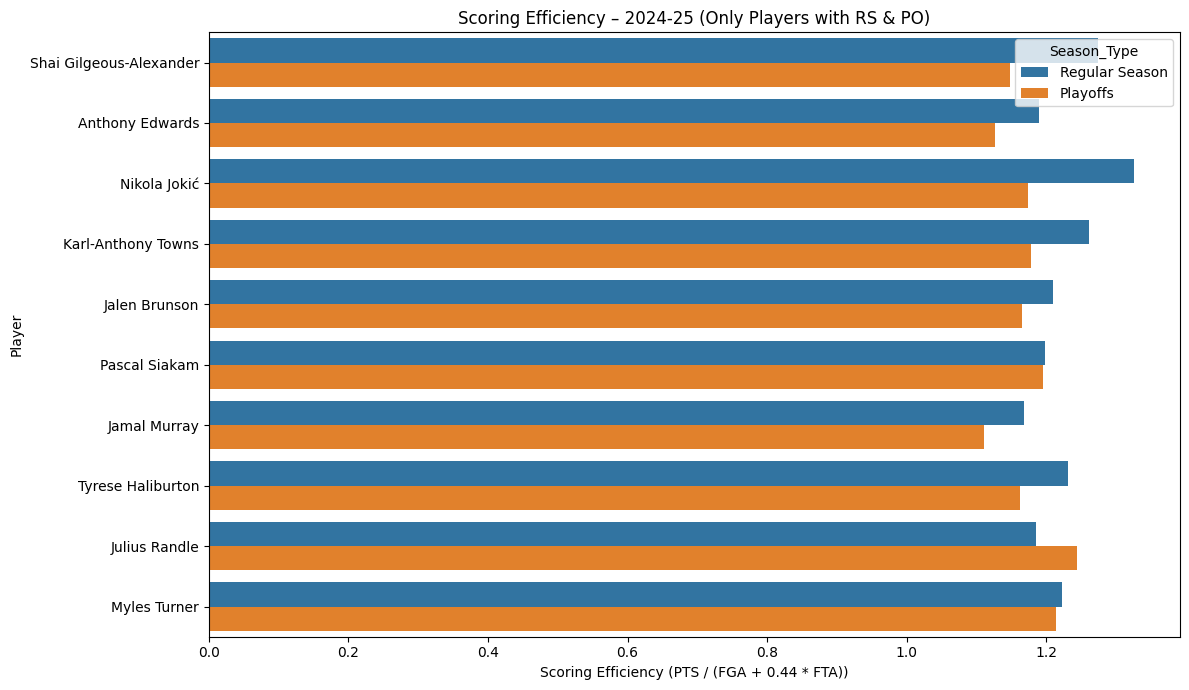

In [17]:
# Plot comparison chart
plt.figure(figsize=(12, 7))
sns.barplot(data=df_plot, x='Scoring_Efficiency', y='PLAYER', hue='Season_Type')
plt.title(f'Scoring Efficiency – {target_year} (Only Players with RS & PO)')
plt.xlabel('Scoring Efficiency (PTS / (FGA + 0.44 * FTA))')
plt.ylabel('Player')
plt.tight_layout()
plt.show()